# 自己相関関数のテスト

https://momonoki2017.blogspot.com/2018/03/python7.html を参考

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
# ファイル読み込み
in_file = '../data/avocado.csv'
df = pd.read_csv(in_file, header=0, index_col=0)
df['Date'] = pd.to_datetime(df['Date'])
df['type'] = pd.Series(np.where(df.type=='conventional', 1, 0), name='type')
df.sort_values(['Date', 'region'])
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,1,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,1,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,1,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,1,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,1,2015,Albany


In [3]:
calif = df[df["region"]=="California"]
calif_AvePrice = calif["AveragePrice"]
calif_AvePrice.index = calif["Date"]

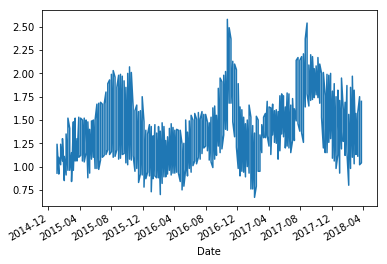

In [4]:
calif_AvePrice.plot()
plt.show()

In [5]:
calif_AvePrice_acf = sm.tsa.stattools.acf(calif_AvePrice, nlags=40) #ラグ=40(デフォルト値)
calif_AvePrice_acf

array([ 1.        ,  0.94111441,  0.89736487,  0.86756756,  0.82831082,
        0.78349658,  0.73283996,  0.68685565,  0.64790432,  0.60380343,
        0.56754211,  0.53540017,  0.50594861,  0.48431606,  0.45365872,
        0.42135518,  0.3997335 ,  0.38146602,  0.3588274 ,  0.32971787,
        0.29981873,  0.28429287,  0.26268741,  0.23828562,  0.22157009,
        0.20389011,  0.19621442,  0.18625356,  0.17104476,  0.16444082,
        0.16676102,  0.17208495,  0.17560627,  0.17896805,  0.19425955,
        0.21308786,  0.22279832,  0.23574443,  0.25843584,  0.27951233,
        0.3025403 ])

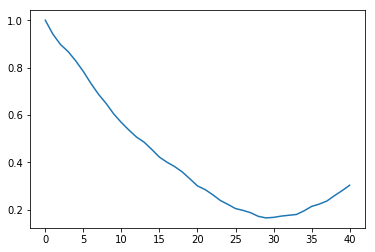

In [6]:
plt.plot(calif_AvePrice_acf)
plt.show()

In [7]:
LAG = 40
rk = np.empty(LAG+1) # 自己相関係数の計算結果を保持用
y = np.array(calif_AvePrice) # データのndarray作成（計算用）
y_mean = np.mean(y) # AveragePriceの平均値

# ラグ0の自己相関係数：1.0
rk[0] = np.sum((y - y_mean)**2) / np.sum((y - y_mean)**2) 

# ラグ1〜40の自己相関係数：-1.0〜1.0
for k in np.arange(1, LAG+1): 
    rk[k] = np.sum((y[k:] - y_mean)*(y[:-k] - y_mean)) / np.sum((y - y_mean)**2)

rk

array([ 1.        ,  0.94111441,  0.89736487,  0.86756756,  0.82831082,
        0.78349658,  0.73283996,  0.68685565,  0.64790432,  0.60380343,
        0.56754211,  0.53540017,  0.50594861,  0.48431606,  0.45365872,
        0.42135518,  0.3997335 ,  0.38146602,  0.3588274 ,  0.32971787,
        0.29981873,  0.28429287,  0.26268741,  0.23828562,  0.22157009,
        0.20389011,  0.19621442,  0.18625356,  0.17104476,  0.16444082,
        0.16676102,  0.17208495,  0.17560627,  0.17896805,  0.19425955,
        0.21308786,  0.22279832,  0.23574443,  0.25843584,  0.27951233,
        0.3025403 ])

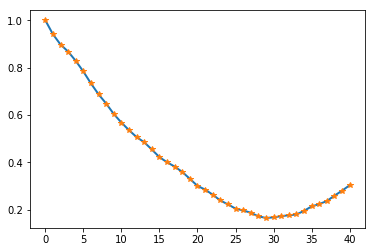

In [8]:
plt.plot(rk,lw=2)
plt.plot(calif_AvePrice_acf,'*', lw=.8)
plt.show()